<a href="https://colab.research.google.com/github/KarinRoe/CLDSPN_Model_Evaluation/blob/master/Copy_of_Hands_on_Convolutional_Neural_Networks_%2B_Prediction_Interpretability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠🔍 Hands on Convolutional Neural Networks + Prediction Interpretability

This notebook will walk you through the process of building a CNN model for predicting [American Sign Language (**ASL**) Guestures](https://en.wikipedia.org/wiki/American_manual_alphabet) using [Keras](https://keras.io/), and then do prediction interpretability using [SHAP](https://github.com/slundberg/shap).

See more about the dataset on [Kaggle](https://www.kaggle.com/datamunge/sign-language-mnist).

First we will import our data

---
**Practicle note ⚡**: becuase we are importing data direct from Cloud Storage into Colab, the data never touches our local computer and is leveraging the super fast  download speeds between Google services.

Download the data using the following command:

```bash
!gsutil cp "gs://fun-datasets/asl_mnist.csv" .
```

In [0]:
# [TASK] downlaod data using gsutil 
!gsutil cp "gs://fun-datasets/asl_mnist.csv" . 

Copying gs://fun-datasets/asl_mnist.csv...
\
Operation completed over 1 objects/100.2 MiB.                                    


Now that the CSV file of our data in donwloaded, we can load it in using [pandas](https://pandas.pydata.org/):

```python
# this is how you import pandas
import pandas as pd

# then read in the CSV file 
data = pd.read_csv("FILE NAME OF CSV")

```

In [0]:
# [TASK] import pandas and read in csv 

import pandas as pd
data = pd.read_csv("asl_mnist.csv")


### Looking at the data
You should have a look at your data:

 ```python
# display the top couple of rows of a pandas dataframe
my_data.head()
 ```

In [0]:
# [TASK] display the first couple of rows of your data using .head()

data.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


## Let's split out data into our inputs (images) and our outputs (ASL labels)

```python
# assign the label column to a varible y
y = data['label'].values

# assign the rest to a varible X
X = data.drop('label', axis = 1).values / 255.
```

In [0]:
# [TASK] split your data into X (inputs) and y (outputs)

y = data["label"].values

X = data.drop("label", axis = 1).values / 255. # scale data down to be betweeen 0 and 1


## Let's actually look at one of these images
Print out the first image:
```python
print(X[0])
```
#### WHAT DO YOU EXPECT TO SEE?


In [0]:
# [TASK] print the first image (what do you expect)
print(X[0])



[0.41960784 0.4627451  0.49803922 0.5254902  0.54509804 0.56078431
 0.57254902 0.58823529 0.6        0.61176471 0.61960784 0.62745098
 0.63921569 0.64705882 0.62352941 0.65098039 0.65882353 0.66666667
 0.66666667 0.67058824 0.67058824 0.67058824 0.6745098  0.67058824
 0.67058824 0.66666667 0.66666667 0.6627451  0.43529412 0.4745098
 0.50588235 0.52941176 0.55294118 0.56470588 0.58039216 0.59215686
 0.60392157 0.61568627 0.62745098 0.63921569 0.64313725 0.66666667
 0.46666667 0.59607843 0.67058824 0.67058824 0.66666667 0.67058824
 0.6745098  0.6745098  0.6745098  0.6745098  0.6745098  0.67058824
 0.67058824 0.66666667 0.44313725 0.48235294 0.51372549 0.5372549
 0.55686275 0.56862745 0.58823529 0.59607843 0.60784314 0.61960784
 0.63137255 0.63921569 0.64313725 0.6745098  0.41176471 0.55686275
 0.66666667 0.67058824 0.67058824 0.67058824 0.6745098  0.6745098
 0.67843137 0.67843137 0.6745098  0.67058824 0.67058824 0.67058824
 0.45490196 0.49019608 0.52156863 0.54509804 0.56078431 0.5725490

## Where's our image!? 😡

So we tried to print our image but got a long list of numbers, WTF?

Well this is becuase it's easy to store pixel lists in CSV files. 

What we have todo is reshape the list into a matrix (image shape), then we can view it like a normal image. 

Todo that we need to know the original dimensions of the image.... it's **`28x28`** (you're welcome 😉)

There is a handy function in [numpy](https://www.numpy.org/) that will do this "reshaping" for us:


![alt text](https://storage.googleapis.com/random-assets/images/reshape.png)


So let's reshape the first image again, then display it using [matplotlib](https://matplotlib.org/):

```python
#import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# reshape image
img = np.reshape(X[0], (original image height, original image width))

# display image
plt.imshow(img)
```




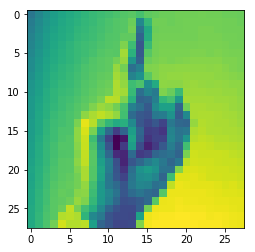

In [0]:
#[TASK] display the first image propery
import numpy as np
import matplotlib.pyplot as plt

img = np.reshape(X[0], (28, 28))

plt.imshow(img)










OK assuming you've displayed one image correctly lets look at a couple of images:

Run the following code to see the first 5 images:

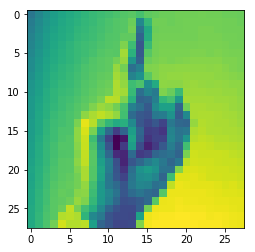

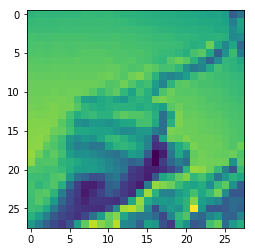

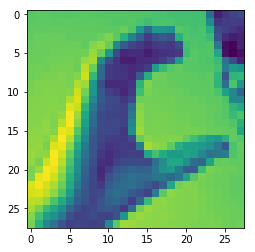

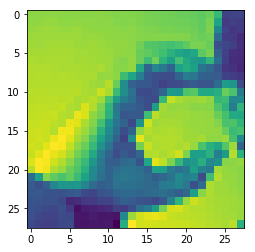

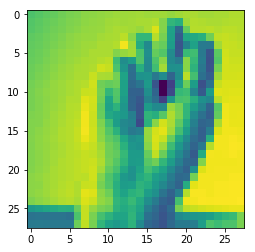

In [0]:
# display the first 5 images

# loop 5 times
for i in range(5):
  # reshape image
  img = np.reshape(X[i], (28, 28))
  # display image
  plt.imshow(img)
  plt.show()

Cool! We can see the images, but what do they mean??

Let's display them along side their labels:

3


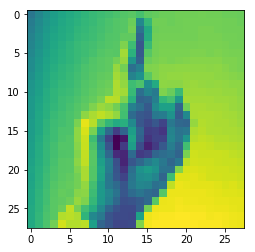

6


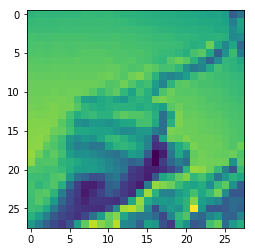

2


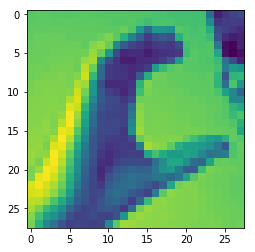

2


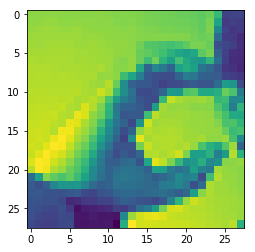

13


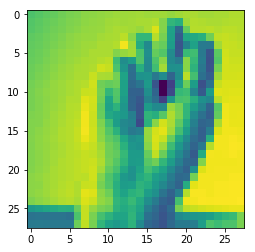

In [0]:
# display the first 5 images with their labels

for i in range(5):

  # display label
  print(y[i])

  img = np.reshape(X[i], (28, 28))
  plt.imshow(img)
  plt.show()

Ok so are labels are **numbers**, not **letters**? 😕

I want to see something like this:

![alt text](https://storage.googleapis.com/random-assets/images/asl.png)

So we will have to convert our numbers to letters:

I've created a handy function to do just that below:

D


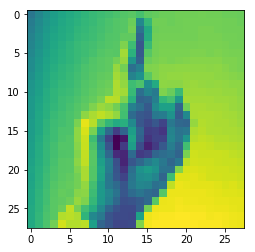

G


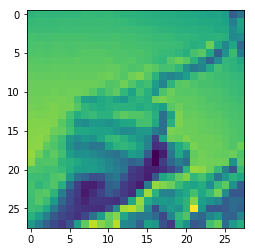

C


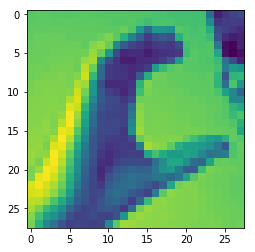

C


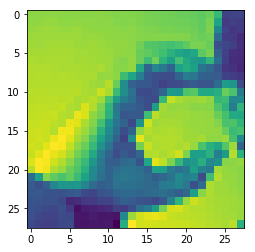

N


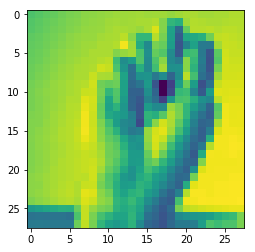

In [0]:
#  display first 5 images with the letters they represent:

# create function to convert number to letter
def number_to_letter(number):
  return chr(number+65)

for i in range(5):
  
  # display (letter) label
  print(number_to_letter(y[i]))

  img = np.reshape(X[i], (28, 28))
  plt.imshow(img)
  plt.show()

Use this chart to see if they are correct:

![alt text](https://storage.googleapis.com/random-assets/images/american_sign_language.PNG)

They are? yes? cool, we can proceed...

## Train/Test spliting our data
Like students being testing in a class room, if you give them the same test twise they'll just need to memorise the answers without actually learning the underlying consept. Thus when then they enter the real world and are faced with unseen problem, they will have no clue. 

So we will split our data into **training** data which the CNN will get to see and learning from, and **testing** data that it dosn't get to see during training, but we will use to make sure the CNN is actually learning.

We can use the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) module from [sklearn](https://scikit-learn.org) to do this for us:

```python
# import module 
from sklearn.model_selection import train_test_split

# while we are here, let's reshape all of our images at once
X_reshaped = np.reshape(X, (len(X), original image height, original image width, 1))

# split our data
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y, test_size=0.20, random_state=42)
```

In [0]:
# [TASK] import the module, reshape all of the images, perform the train/test split

from sklearn.model_selection import train_test_split

X_reshaped = np.reshape(X, (len(X), 28, 28, 1))
print(X_reshaped.shape)

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size = 0.20, random_state = 42)






(34627, 28, 28, 1)


Let's have a peek at the dimensions (shape) of our data:

In [0]:
# let's quickly check the dimensions of our data
print("training input data - ", x_train.shape)
print("testing input data - ", x_test.shape)

print("training output data - ", y_train.shape)
print("testing output data - ", y_test.shape)

training input data -  (27701, 28, 28, 1)
testing input data -  (6926, 28, 28, 1)
training output data -  (27701,)
testing output data -  (6926,)


## Hold the phone! What does our output data look like?

Print out the first 10 outputs:

```python
print(y_train[:10])
```


In [0]:
# [TASK] print out the first 10 outputs

print(y_train[:10])



[ 6  2 14  5 16  7 24 10 21  3]


### Hmmmmmm, we have an issue with this:
<img height=300px src="https://storage.googleapis.com/random-assets/images/not_impressed_doggo.jpg">

Although we did agree that it's fine that our labels are numbers (becuase we can easily convert them to the ASL letters), our Convolutional Neural Network agreed to no such thing! In fact our CNN is alot more picky, it wants them as a [One-hot-encoded](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) matrix!!!

It's all becuase of the structure of the CNN! Specifically the last layer, which is a singel node for each possible label (every letter of the alphabet in this case):

![alt text](https://storage.googleapis.com/random-assets/images/one_hot_cnn.png)

So let's quickly convert our number labels to the right format for the CNN (One-hot-encoded):

In [0]:
# convert our output numbers to the one-hot-encoded version
import keras

# get our data again
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y, test_size=0.20, random_state=42)

# encode the outputs (y's) as one-hot
y_train = keras.utils.to_categorical(y_train, 25)
y_test = keras.utils.to_categorical(y_test, 25)

Using TensorFlow backend.


Let's peek at teh new shape of our out data:

In [0]:
# let's quickly check the dimensions of our data
print("training input data - ", X_train.shape)
print("testing input data - ", X_test.shape)

print("training output data - ", y_train.shape)
print("testing output data - ", y_test.shape)

training input data -  (27701, 28, 28, 1)
testing input data -  (6926, 28, 28, 1)
training output data -  (27701, 25)
testing output data -  (6926, 25)


Ok but what does it actually look like now:

Print out the first 10 outputs:
```python
print(y_train[:10])
```

In [0]:
# [TASK] print out the first 10 output
print(y_train[:10])




[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]


### That might look ugly to us, but beautiful to our Convolutional Neural Network 😍

# Time to build the Convolutional Neural Network!!!

![alt text](https://storage.googleapis.com/random-assets/images/excited_pup.gif)

What's not that exciting is that we are just going to copy and past the same CNN that is in the [keras github for solving the mnist handwriting problem](https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py). 

### This is pragmatic ML: find a model that does something similar and copy it!

*machine learning is all about adapting to new patterns*

here's teh code to build our model:


```python
# build new Convolutional Neural Network!

#import the nessasary keras modules
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

# start a new model
model = Sequential()

# create input layer (be sure to tell it the shape of data to expect)
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(ORIGINAL WIDTH OF IMAGE, ORIGINAL HEIGHT OF IMAGE, 1)))

# add soem more layers, why not!
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# you can change all of the previous stuff (except the input layer) and the following "output" layer
# be sure to fill in the shape of our output layer
model.add(Dense(THE WIDTH OF OUR ONE-HOT-ENCODED OUTPUT MATRIX, activation='softmax'))

# compile our model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
```

In [0]:
# [TASK] build new Convolutional Neural Network!

# import the nessasary keras modules
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

# start a new model
model = Sequential() # blank slate how to start in keras

# create input layer (be sure to tell it the shape of data to expect)
model.add(Conv2D(32, kernel_size=(3, 3), # Conv2D is for a two deminsional for text is one d, 32 
                 activation='relu', # equationsion
                 input_shape=(28, 28, 1))) # input shape important 1 represent the channel greyscale = 1

# add some more layers, be aware of overfitting
model.add(Conv2D(64, (3,3), activation = "relu")) # add more filters
model.add(MaxPooling2D(pool_size = (2, 2))) # reduces the size of the image, only 2 be 2 pixel, reduced the noise
model.add(Dropout(0.25)) # randimly takes pixel out 
model.add(Flatten()) # 
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(25, activation = "softmax")) # activation softmax, 

#complile out model
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ["accuracy"])















W0625 19:04:46.385542 140357738321792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0625 19:04:46.448626 140357738321792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0625 19:04:46.457955 140357738321792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0625 19:04:46.532754 140357738321792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0625 19:04:46.536656 140357738321792 deprecation_wrapp

##<font color=red> Don't worry about any warnings above</font> 


## Let's train our CNN
Use the following code to train the CNN:

```python
# train our CNN on our training data for 5 epochs (cycles through our dataset)
model.fit(X_train, y_train,
          batch_size=128,
          epochs=5,
          verbose=1,
          validation_data=(X_test, y_test))

# print out the final accuracy scores of our CNN          
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

```

In [0]:
# [TASK] run the training process
model.fit(X_train, y_train,
         batch_size = 128,
         epochs = 5,
         verbose = 1,
         validation_data = (X_test, y_test)
         )

#print out the final accuracy scores of our CNN
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])










W0625 19:07:51.037309 140357738321792 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 27701 samples, validate on 6926 samples
Epoch 1/5
27701/27701 [==============================] - 75s 3ms/step - loss: 1.8095 - acc: 0.4496 - val_loss: 0.3617 - val_acc: 0.9196
Epoch 2/5
27701/27701 [==============================] - 74s 3ms/step - loss: 0.5107 - acc: 0.8329 - val_loss: 0.0796 - val_acc: 0.9903
Epoch 3/5
27701/27701 [==============================] - 74s 3ms/step - loss: 0.2714 - acc: 0.9085 - val_loss: 0.0226 - val_acc: 0.9999
Epoch 4/5
27701/27701 [==============================] - 74s 3ms/step - loss: 0.1767 - acc: 0.9417 - val_loss: 0.0082 - val_acc: 1.0000
Epoch 5/5
27701/27701 [==============================] - 74s 3ms/step - loss: 0.1387 - acc: 0.9531 - val_loss: 0.0043 - val_acc: 0.9999
Test loss: 0.004291889925663223
Test accuracy: 0.9998556165174703


## Let's look at some predictions from our newly trained CNN:

In [0]:
# fetch predictions for the first 10 TEST images (images not seen by CNN)
model.predict_classes(X_test[:10])

array([ 8,  2, 17,  7, 12, 12, 14, 16, 19, 14])

In [0]:
# fetch predictions, convert them to letters
predictions = [number_to_letter(l) for l in model.predict_classes(X_test[:10])]
predictions

['I', 'C', 'R', 'H', 'M', 'M', 'O', 'Q', 'T', 'O']

Let's actually look at the predictions alongside the input images and see if they are correct:

Use this chart to see if they are correct:

![alt text](https://storage.googleapis.com/random-assets/images/american_sign_language.PNG)

prediction =  I


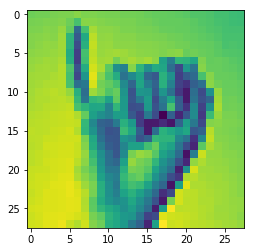

prediction =  C


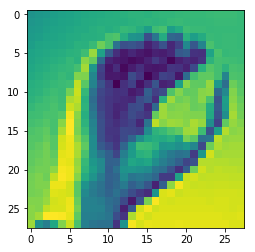

prediction =  R


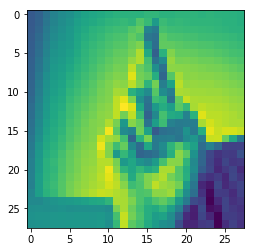

prediction =  H


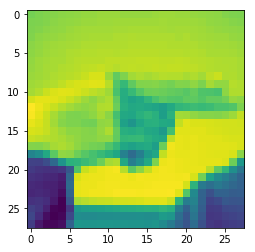

prediction =  M


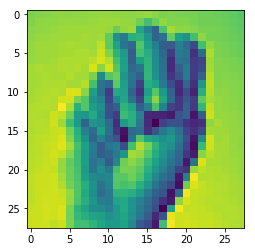

prediction =  M


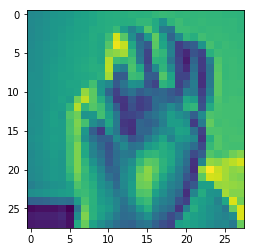

prediction =  O


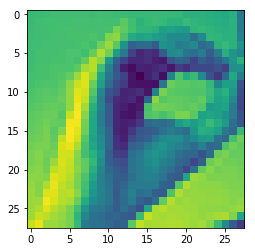

prediction =  Q


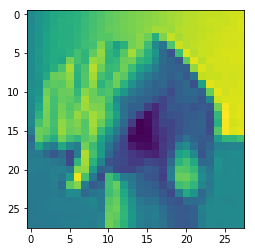

prediction =  T


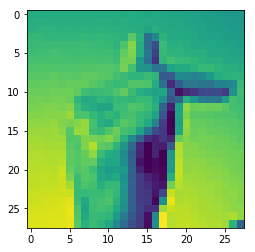

prediction =  O


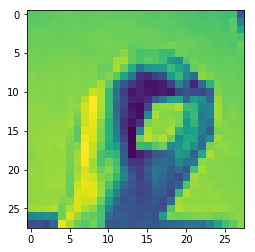

In [0]:
# show predictions with input images

for i in range(10):
  print("prediction = ", predictions[i])
  plt.imshow(X_test[i,:,:,0])
  plt.show()

# Congrats on building a sign language detecting Convolutional Neural Network ✋

If you found that useful: feel free to let use know with a tweet:

<a href="https://twitter.com/intent/tweet?text=Learning+about+interpreting+%23CNNs+using+the+SHAP+library+with+%23keras+on+%40GoogleColab+notebooks.+%0D%0AThanks+%40datalondon+%26+%40zackakil+for+the+awesome+meetup%21+%23datalondon+%23datascience+%23machinelearning+%0D%0Ahttps%3A%2F%2Frebrand.ly%2FCLDS-meetup-june25"><img src="https://storage.googleapis.com/events_public_polong/CLDS_Meetups/CLDS_tweet_20190625.png"></a>

# But wait! There's more! Let's see what our CNN sees! 🧐

There is a big push for more understanding around the kind of model that you have just built. [SHAP](https://github.com/slundberg/shap) is a tool that helps you do just that, by highlighting the areas of an image that the Convolutional Neural Network used most in making its' prediction.


![alt text](https://storage.googleapis.com/random-assets/images/shap.png)

## Let's run it on our CNN for the test data:

But first we need to install it in Colab (becuase it is not a standard ML package)

Install SHAP with teh following command:
```bash
!pip install shap 
```

In [0]:
# [TASK] install SHAP
!pip install shap 




     |████████████████████████████████| 235kB 4.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/00/20/87/d199e4d7397997f5494e4098104f91313ac8120753bee7b032
Successfully built shap


## We'll cut to the chase becuase it's currently abit fiddely to use

straight from the [SHAP documentation](https://github.com/slundberg/shap):

---
*Predictions for two input images are explained in the plot [below]. Red pixels represent positive SHAP values that increase the probability of the class, while blue pixels represent negative SHAP values the reduce the probability of the class. By using ranked_outputs=2 we explain only the two most likely classes for each input (this spares us from explaining all [25] classes).*

---
Run the code below to see why the CNN made it's predictions:



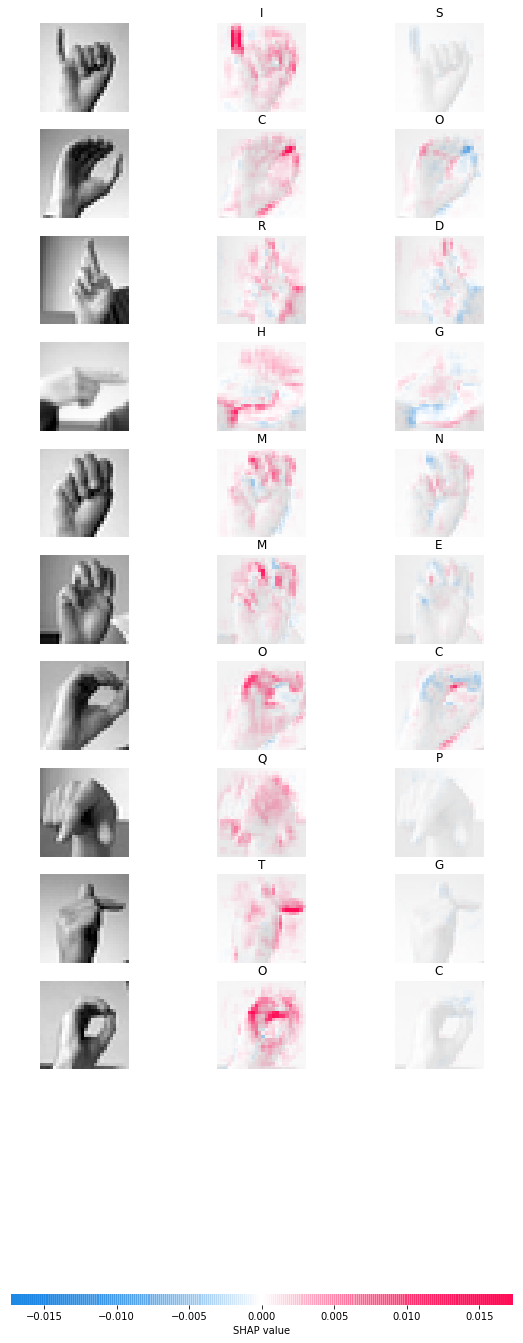

In [0]:
import shap
import keras.backend as K

# what data do we want to understand [feel free to change this]
data_to_explain = X_test[:10]

# tell SHAP what layer in our CNN to look at for it's analysis 
# [you can play with the number to see different parts of the CNN]
layer_to_explain = model.layers[1].input

# analyse 300 examples to work out how varied the signal in the CNN gets
# 
sess = K.get_session().run(layer_to_explain, {model.layers[0].input: X_train[:300]})
explainer = shap.GradientExplainer( (layer_to_explain, model.layers[-1].output), sess)

# analyse the data we want to explain
sess2 = K.get_session().run(layer_to_explain, {model.layers[0].input: data_to_explain })
shap_values, indexes = explainer.shap_values(sess2, ranked_outputs=2)

# view the results
shap.image_plot(shap_values,  data_to_explain,  np.vectorize(number_to_letter)(indexes))

# There you go!, You've built a CNN, and explained it's predictions!! 🏁


Don't forget to tweet at us if you found this useful:

<a href="https://twitter.com/intent/tweet?text=Learning+about+interpreting+%23CNNs+using+the+SHAP+library+with+%23keras+on+%40GoogleColab+notebooks.+%0D%0AThanks+%40datalondon+%26+%40zackakil+for+the+awesome+meetup%21+%23datalondon+%23datascience+%23machinelearning+%0D%0Ahttps%3A%2F%2Frebrand.ly%2FCLDS-meetup-june25"><img src="https://storage.googleapis.com/events_public_polong/CLDS_Meetups/CLDS_tweet_20190625.png"></a>